In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_pickle("saved_df.pkl")

In [3]:
df.shape

(707, 9)

<AxesSubplot:>

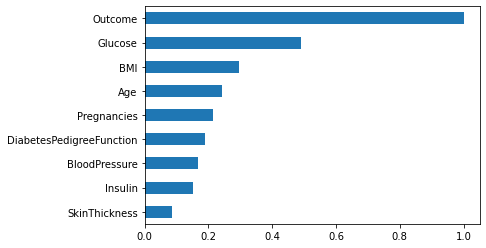

In [4]:
df.corr()["Outcome"].sort_values().plot.barh()

In [5]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Let's first see how the logistic regression performs with this data.

log_model = LogisticRegression(max_iter=400)
log_model.fit(X_train, y_train)
y_pred_logistic = log_model.predict(X_test)
confusion_matrix(y_test, y_pred_logistic)

array([[127,  19],
       [ 24,  43]])

In [8]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       146
           1       0.69      0.64      0.67        67

    accuracy                           0.80       213
   macro avg       0.77      0.76      0.76       213
weighted avg       0.79      0.80      0.80       213



In [9]:
sc = StandardScaler()

In [10]:
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [11]:
knn_model = KNeighborsClassifier().fit(scaled_X_train, y_train)

In [12]:
y_pred = knn_model.predict(scaled_X_test)

In [13]:
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [15]:
knn = KNeighborsClassifier()

In [16]:
knn_params = {"n_neighbors": np.arange(1, 50)}

In [17]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(scaled_X_train, y_train)

In [18]:
knn_cv_model.best_params_

{'n_neighbors': 13}

In [19]:
knn_tuned = KNeighborsClassifier(n_neighbors = 13).fit(scaled_X_train, y_train)

In [20]:
y_pred_tuned = knn_tuned.predict(scaled_X_test)

In [21]:
confusion_matrix(y_test, y_pred_tuned)

array([[129,  17],
       [ 35,  32]])

In [22]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



In [23]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring="recall", cv=10).fit(scaled_X_train, y_train)

In [24]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [25]:
knn_tuned = KNeighborsClassifier(n_neighbors = 1).fit(scaled_X_train, y_train)

In [26]:
y_pred = knn_tuned.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[110,  36],
       [ 28,  39]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       146
           1       0.52      0.58      0.55        67

    accuracy                           0.70       213
   macro avg       0.66      0.67      0.66       213
weighted avg       0.71      0.70      0.70       213

